In [1]:
# Essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')
df.head()
df = df.drop('CustomerID', axis=1)
df.mean()

A1          0.678261
A2         31.568203
A3          4.758725
A4          1.766667
A5          7.372464
A6          4.692754
A7          2.223406
A8          0.523188
A9          0.427536
A10         2.400000
A11         0.457971
A12         1.928986
A13       184.014493
A14      1018.385507
Class       0.444928
dtype: float64


# Load the dataset
df = pd.read_csv('Credit_Card_Applications.csv')  # Read the CSV file into a DataFrame
df.head()  # Display the first few rows of the DataFrame
df = df.drop('CustomerID', axis=1)  # Drop the 'CustomerID' column as it is not needed for analysis
df.mean()  # Calculate and display the mean of each column

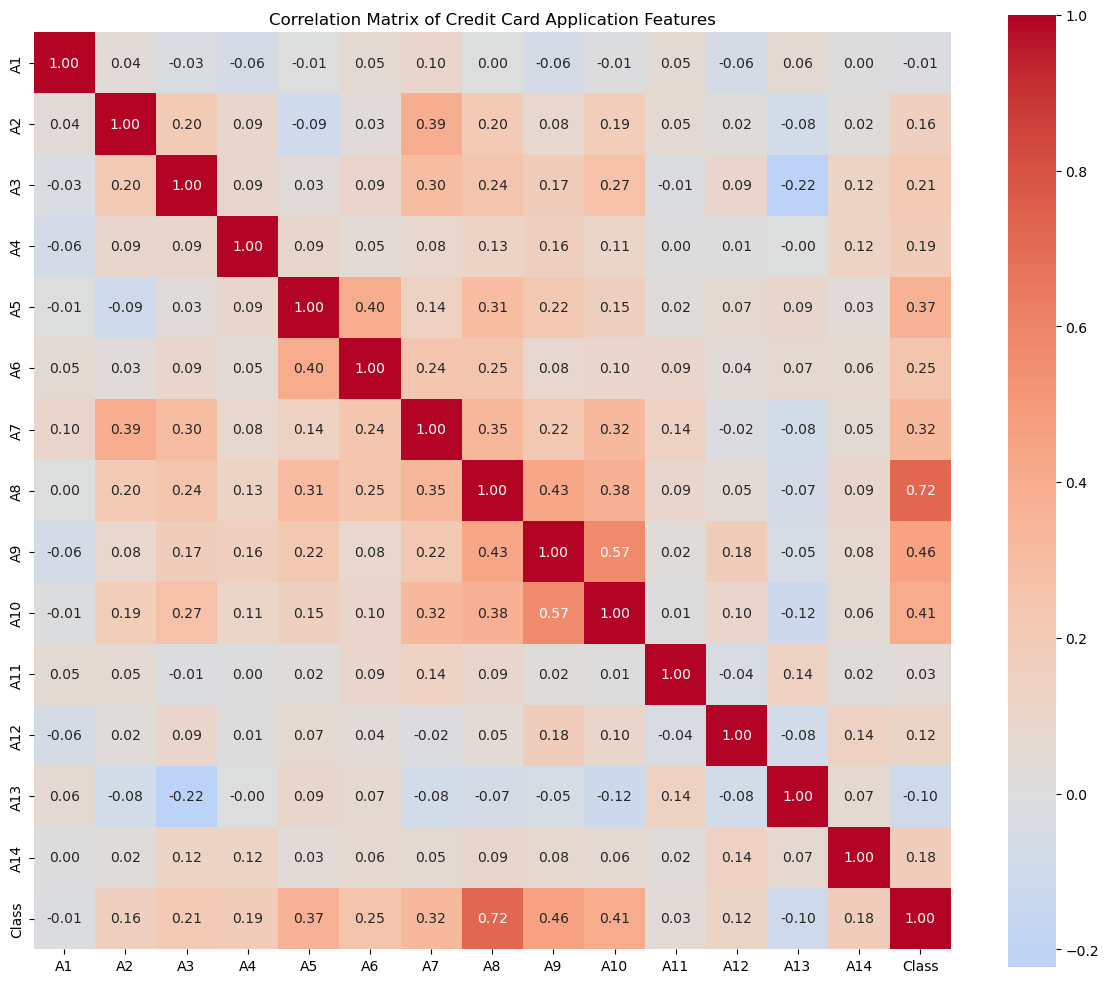


Correlations with Target Variable (Class):
Class    1.000000
A8       0.720407
A9       0.458301
A10      0.406410
A5       0.373712
A7       0.322475
A6       0.246567
A3       0.206294
A4       0.194306
A14      0.175657
A2       0.161626
A12      0.115261
A11      0.031625
A1      -0.013897
A13     -0.099972
Name: Class, dtype: float64


In [3]:
# Create correlation matrix
correlation_matrix = df.corr()

# Create a heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format numbers to 2 decimal places
            square=True)  # Make the plot square-shaped

plt.title('Correlation Matrix of Credit Card Application Features')
plt.tight_layout()
plt.show()

# If you want to see the most correlated features with the target variable (Class)
print("\nCorrelations with Target Variable (Class):")
correlations_with_class = correlation_matrix['Class'].sort_values(ascending=False)
print(correlations_with_class)

# Create correlation matrix
correlation_matrix = df.corr()  # Compute the correlation matrix for the DataFrame

# Create a heatmap visualization
plt.figure(figsize=(12, 10))  # Set the figure size for the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values on the heatmap
            cmap='coolwarm',  # Set the color scheme for the heatmap
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format numbers to 2 decimal places
            square=True)  # Make the plot square-shaped

plt.title('Correlation Matrix of Credit Card Application Features')  # Set the title of the heatmap
plt.tight_layout()  # Adjust the layout to prevent clipping of tick-labels
plt.show()  # Display the heatmap

# If you want to see the most correlated features with the target variable (Class)
print("\nCorrelations with Target Variable (Class):")  # Print a message
correlations_with_class = correlation_matrix['Class'].sort_values(ascending=False)  # Sort correlations with the target variable
print(correlations_with_class)  # Display the sorted correlations


In [4]:


# Select features with correlation > 0.2
important_features = ['A8', 'A9', 'A10', 'A5', 'A7','A6','A3']
x = df[important_features]
y = df['Class']

x_dev, x_test ,y_dev, y_test =train_test_split(x,y, test_size =0.25, random_state=42 )
x_train, x_val ,y_train, y_val =train_test_split(x_dev,y_dev, test_size =0.25, random_state=42 )
def stand(x_1, x_2):
  
    scaler = StandardScaler()
    x_1_scaled = scaler.fit_transform(x_1)
    x_2_scaled = scaler.transform(x_2)
    
    
    return  x_1_scaled, x_2_scaled

# Select features with correlation > 0.2
important_features = ['A8', 'A9', 'A10', 'A5', 'A7','A6','A3']  # Define important features based on correlation
x = df[important_features]  # Select features for training
y = df['Class']  # Define the target variable# Split the data into training, validation, and test sets
x_dev, x_test, y_dev, y_test = train_test_split(x, y, test_size=0.25, random_state=42)  # Split into dev and test sets
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.25, random_state=42)  # Split dev set into train and validation sets.  # Function to standardize features
def stand(x_1, x_2):
    scaler = StandardScaler()  # Initialize the StandardScaler
    x_1_scaled = scaler.fit_transform(x_1)  # Fit and transform the training data
    x_2_scaled = scaler.transform(x_2)  # Transform the validation/test data using the same scaler
    return x_1_scaled, x_2_scaled  # Return the scaled datasets


Accuracy on training set: 0.9948320413436692
Accuracy on validation set: 0.8615384615384616
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        67
           1       0.86      0.86      0.86        63

    accuracy                           0.86       130
   macro avg       0.86      0.86      0.86       130
weighted avg       0.86      0.86      0.86       130

Confusion Matrix:
 [[58  9]
 [ 9 54]]


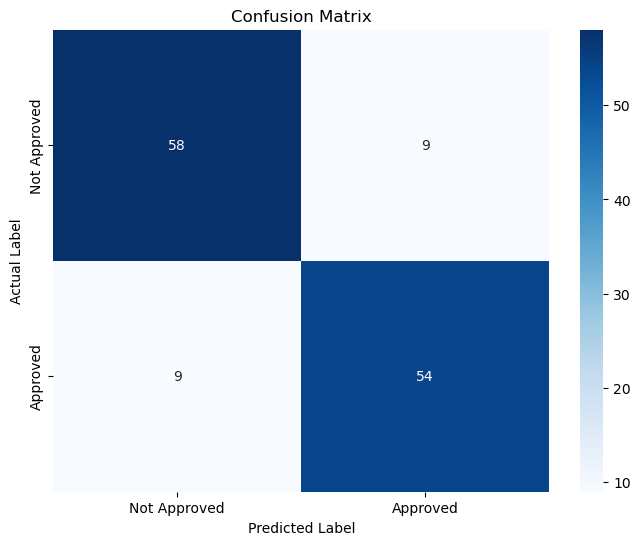

In [5]:
rf_classifier = RandomForestClassifier(random_state=42)
x_train_scaled, x_val_scaled = stand(x_train, x_val)


rf_classifier.fit(x_train_scaled, y_train)


y_val_pred = rf_classifier.predict(x_val_scaled)


print("Accuracy on training set:", rf_classifier.score(x_train_scaled,y_train))
print("Accuracy on validation set:", accuracy_score(y_val, y_val_pred))

print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)  # Replace y_val and y_val_pred with your actual variables

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Use 'Blues' color map
            xticklabels=['Not Approved', 'Approved'],  # Replace with your class labels
            yticklabels=['Not Approved', 'Approved'])  # Replace with your class labels
plt.ylabel('Actual Label')  # Label for the y-axis
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)  # Create a Random Forest classifier
x_train_scaled, x_val_scaled = stand(x_train, x_val)  # Standardize the training and validation sets

rf_classifier.fit(x_train_scaled, y_train)  # Fit the classifier to the training data

# Make predictions and evaluate the model
y_val_pred = rf_classifier.predict(x_val_scaled)  # Predict on the validation set

print("Accuracy on training set:", rf_classifier.score(x_train_scaled, y_train))  # Print training accuracy
print("Accuracy on validation set:", accuracy_score(y_val, y_val_pred))  # Print validation accuracy

print("Classification Report:\n", classification_report(y_val, y_val_pred))  # Print classification report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))  # Print confusion matrix

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Added 200 and 500 for finer control over performance vs. training time
    'max_depth': [10, 20, 30, None],  # Added 30 for intermediate complexity
    'min_samples_split': [2, 5, 10],  # Added for finer control over splits
    'min_samples_leaf': [1, 2, 4],  # More options to better handle overfitting in credit decisions
    'class_weight': ['balanced', 'balanced_subsample', None],  # Included `None` for flexibility
    'max_features': ['sqrt', 'log2', None]  # Added `None` to explore using all features
}



# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters found:  {'class_weight': 'balanced', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score:  0.8681984681984682


# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced', 'balanced_subsample', None],  # Weights associated with classes
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)  # Set up GridSearchCV with cross-validation

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train)  # Fit the grid search to the training data

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)  # Print the best parameters found
print("Best cross-validation score: ", grid_search.best_score_)  # Print the best cross-validation score

Accuracy on training set: 0.9043927648578811
Accuracy on validation set: 0.8692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        67
           1       0.84      0.90      0.87        63

    accuracy                           0.87       130
   macro avg       0.87      0.87      0.87       130
weighted avg       0.87      0.87      0.87       130

Confusion Matrix:
 [[56 11]
 [ 6 57]]


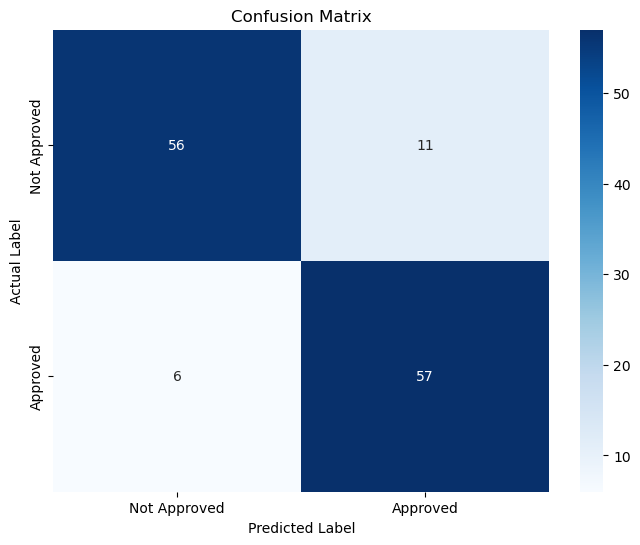

In [7]:
optimalrf = RandomForestClassifier(**grid_search.best_params_, random_state=42)  
optimalrf.fit(x_train_scaled, y_train)

y_val_pred = optimalrf.predict(x_val_scaled)

# Evaluate the model
print("Accuracy on training set:", optimalrf.score(x_train_scaled, y_train)) 
print("Accuracy on validation set:", accuracy_score(y_val, y_val_pred))

print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
cm = confusion_matrix(y_val, y_val_pred)  # Replace y_val and y_val_pred with your actual variables

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Use 'Blues' color map
            xticklabels=['Not Approved', 'Approved'],  # Replace with your class labels
            yticklabels=['Not Approved', 'Approved'])  # Replace with your class labels
plt.ylabel('Actual Label')  # Label for the y-axis
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

# Train the optimal Random Forest classifier with the best parameters
optimalrf = RandomForestClassifier(**grid_search.best_params_, random_state=42)  # Create a new classifier with the best parameters
optimalrf.fit(x_train_scaled, y_train)  # Fit the optimal classifier to the training data

# Evaluate the model
y_val_pred = optimalrf.predict(x_val_scaled)  # Predict on the validation set

print("Accuracy on training set:", optimalrf.score(x_train_scaled, y_train))  # Print training accuracy
print("Accuracy on validation set:", accuracy_score(y_val, y_val_pred))  # Print validation accuracy

print("Classification Report:\n", classification_report(y_val, y_val_pred))  # Print classification report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))  # Print confusion matrix

Accuracy on devlopment set: 0.9148936170212766
Accuracy on test set: 0.8670520231213873
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       107
           1       0.80      0.86      0.83        66

    accuracy                           0.87       173
   macro avg       0.86      0.87      0.86       173
weighted avg       0.87      0.87      0.87       173

Confusion Matrix:
 [[93 14]
 [ 9 57]]


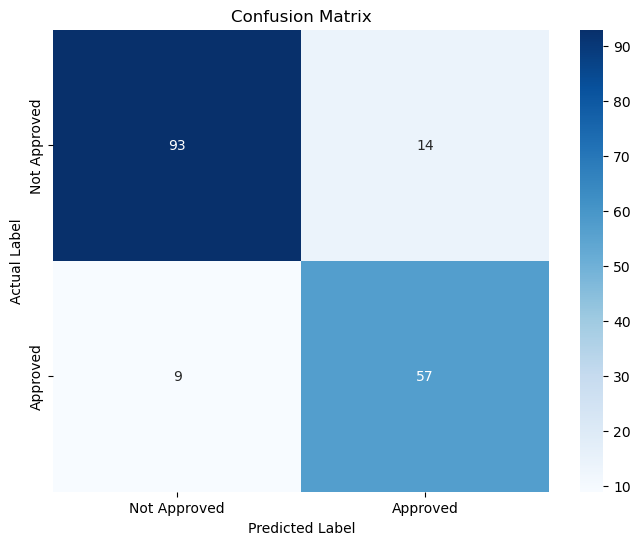

In [8]:
x_dev_scaled, x_test_scaled = stand(x_dev, x_test)
optimalrf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
optimalrf.fit(x_dev_scaled, y_dev)


y_test_pred = optimalrf.predict(x_test_scaled)

# Evaluate the model
print("Accuracy on devlopment set:", optimalrf.score(x_dev_scaled, y_dev))  
print("Accuracy on test set:", accuracy_score(y_test, y_test_pred))

print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)  # Replace y_val and y_val_pred with your actual variables

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Use 'Blues' color map
            xticklabels=['Not Approved', 'Approved'],  # Replace with your class labels
            yticklabels=['Not Approved', 'Approved'])  # Replace with your class labels
plt.ylabel('Actual Label')  # Label for the y-axis
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot

# Scale the development and test sets
x_dev_scaled, x_test_scaled = stand(x_dev, x_test)  # Standardize the development and test sets
optimalrf = RandomForestClassifier(**grid_search.best_params_, random_state=42)  # Create a new classifier with the best parameters
optimalrf.fit(x_dev_scaled, y_dev)  # Fit the optimal classifier to the development data

# Evaluate the model on the test set
y_test_pred = optimalrf.predict(x_test_scaled)  # Predict on the test set

print("Accuracy on development set:", optimalrf.score(x_dev_scaled, y_dev))  # Print development set accuracy
print("Accuracy on test set:", accuracy_score(y_test, y_test_pred))  # Print test set accuracy

print("Classification Report:\n", classification_report(y_test, y_test_pred))  # Print classification report for test set
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))  # Print confusion matrix for test set